# Deep Learning 2025 - Assignment 1



## Outline
#### <span style="color: blue;">Submission</span>
We will give 2 weeks for each assignment and more for the final project.

The grades will be released after the deadline. Please also put your name and student number (if you have one) in the file name of the returned assignments. (DL2025_assign1_NAME_SURNAME_STUDENTNUMBER.ipynb)

#### <span style="color: blue;">In this assignment, you will learn</span>
* How to load data and create a train/test split.
* How to build your own Pytorch model for simple logistic regression (linear classification) problem.
* Training the model with binary cross entropy loss in Pytorch.
* Simple visualisation of data, loss and linear model.

#### <span style="color: blue;">Tasks & grading </span>(<span style="color:green">10 points</span>)
* **Part 1. Load dataset and split into training and testing sets (<span style="color:green">1 point</span>)**
* **Part 2. Linear classification and logistic regression (<span style="color:green">9 points</span>)**
  * Part 2.0 Sklearn Logistic Regression
  * Part 2.1 Model (<span style="color:green">3.5 points</span>)
  * Part 2.2 Training (<span style="color:green">5.5 points</span>)

#### <span style="color: blue;">Environment</span>
Python 3 + Sklearn + Pytorch (>=1.3) + Pandas.<br>
Other libraries should be installed correctly such as numpy, matplotlib, *etc*., according to the dependencies of the assignment. <br>
If you haven’t installed Pytorch and Jupyter notebook in your computer, an alternative environment to finish the assignment is CSC notebook: [`https://noppe.2.rahtiapp.fi/`](https://noppe.2.rahtiapp.fi/) -> log in with HaKa using your university account -> Practical Deep Learning(refers to the following figure).
Also, googlecolab is a very good option. Computer rooms TS135 and TS137 contain computers with GPUs that you can utilise as well.

<img src=https://i.postimg.cc/RCy9SgHf/CSC-Jupyter.png width="1000">

We will give 2 weeks for each assignment and more for the final project. So it may happen where the new assignment is published before the deadline of the previous assignment. Please do not wait till the last minute to complete the assigments, as they can be time consuming.

#### <span style="color: blue;">Dataset</span>
* Breast Cancer Wisconsin (Diagnostic) dataset
  * It is a widely used dataset in machine learning and medical research
particularly for binary classification tasks involving breast cancer diagnosis.
  * It contains 569 samples each composed of 30 numerical features representing a breast tumor and a target class that is either benign (non-cancerous)or malignant (cancerous).
  * It can be easily loaded from sklearn library.

#### <span style="color: blue;">Hints</span>
* To find the place where you have to insert your solution, hit Crtl + F and search for **TODO:** . You are not supposed to modify the code from other parts.
* **Be careful with the shape** of the weights, gradient, .. of your tensor in your implementation. Double check and make sure the shapes fit for computation, especially matrix multiplication.
* Use only PyTorch functions in the model, and avoid explicit loops. For example, if you use a for loop inside the model function, you lose parallelism and the model will not run efficiently on GPUs. Once the data is loaded as tensors, you should continue to use PyTorch functions; converting them to NumPy arrays inside the training loop will prevent efficient training.
* Check the examples from the Introduction to Deep Learning Software lecture, as they can help you better understand the assignment.

## Part 1. Load dataset and split into training and testing sets

In this part, we will load the Breast Cancer Wisconsin (Diagnostic) dataset from the sklearn library. The features will be stored in a pandas DataFrame, and the target class labels in a pandas Series. We will then normalize the feature values to have a mean of 0 and a standard deviation of 1. This normalization step is important because it helps the classification boundary converge more effectively during training.

First, you need to split the samples into training and testing sets using the train_test_split function from sklearn, while preserving the distribution of class labels in both splits so that it is consistent with the overall dataset. Then, you will create a 2D plot of the first two features of the data, showing both the training and testing samples and distinguishing between the two different classes.

In [1]:
# Run this cell as it is to ensure reproducibility

import random
import numpy as np
import torch

# Set seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# If using CUDA
torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print(X.shape)
print(y.value_counts())

(569, 30)
1    357
0    212
Name: count, dtype: int64


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

shape of X_train and y_train:  (455, 30) (455,)
shape of X_test and y_test:  (114, 30) (114,)
value_counts of y_train:
 1    285
0    170
Name: count, dtype: int64
value_counts of y_test:
 1    72
0    42
Name: count, dtype: int64
Top 2 feature names: ['mean radius', 'mean texture']
X_train_selected shape: (455, 2)
X_test_selected shape: (114, 2)


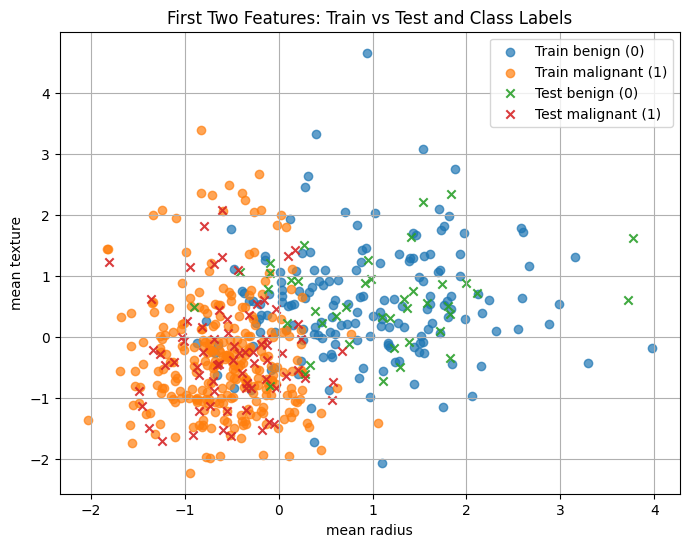

In [8]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# TODO: (1 point, details are given below):

# Divide the data into a training set (80%) and a test set (20%), resulting in X_train, X_test, y_train, and y_test (0.5 point)
# Use the X_scaled array and y series during the division
# Use train_test_split() function setting the random_state parameter to 42 and preserving the distribution of classes in y to be similar in both splits
# Hint: search about stratify parameter in train_test_split() function

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("shape of X_train and y_train: ",X_train.shape,y_train.shape)
print("shape of X_test and y_test: ",X_test.shape,y_test.shape)

print("value_counts of y_train:\n", y_train.value_counts())
print("value_counts of y_test:\n", y_test.value_counts())

# plot the first 2 features in the dataset. (0.5 point)
# Train and test samples should be in a single figure with two different markers and the samples of each class label in each split should have different colors.
# Hint: plt.figure(), plt.scatter()

first_2_features = data.feature_names[[0, 1]]
X_train_first_2 = X_train[:, [0, 1]]
X_test_first_2 = X_test[:, [0, 1]]

print("Top 2 feature names:", first_2_features.tolist())
print("X_train_selected shape:", X_train_first_2.shape)
print("X_test_selected shape:", X_test_first_2.shape)


plt.figure(figsize=(8, 6))


train_benign = (y_train == 0)
train_malignant = (y_train == 1)
test_benign = (y_test == 0)
test_malignant = (y_test == 1)

# Train samples  I put (marker 'o')
plt.scatter(
    X_train_first_2[train_benign, 0],
    X_train_first_2[train_benign, 1],
    c='tab:blue',
    marker='o',
    alpha=0.7,
    label='Train benign (0)'
)
plt.scatter(
    X_train_first_2[train_malignant, 0],
    X_train_first_2[train_malignant, 1],
    c='tab:orange',
    marker='o',
    alpha=0.7,
    label='Train malignant (1)'
)

# Test samples  I put (marker 'x')
plt.scatter(
    X_test_first_2[test_benign, 0],
    X_test_first_2[test_benign, 1],
    c='tab:green',
    marker='x',
    alpha=0.9,
    label='Test benign (0)'
)
plt.scatter(
    X_test_first_2[test_malignant, 0],
    X_test_first_2[test_malignant, 1],
    c='tab:red',
    marker='x',
    alpha=0.9,
    label='Test malignant (1)'
)

plt.xlabel(first_2_features[0])
plt.ylabel(first_2_features[1])
plt.title("First Two Features: Train vs Test and Class Labels")
plt.legend()
plt.grid(True)
plt.show()

## Part 2. Solving the linear classification problem in Pytorch using logistic regression algorithm
Congratulations you have prepared the data correctly! Now we will move onto creating our model and training it.

This task inculdes:


*   Defining Models (Hints: torch.nn, nn.Module, nn.Parameter, torch.log, torch.tensor)
*   Training Model (Hints: model.train, torch.optim.SGD, optimizer.zero_grad, loss.backward, optimizer.step)
*   Evaluating Model (Hints: model.eval)

### 2.1 Sklearn Logistic Regression
In this part, you will run the built-in logistic regression algorithm from the sklearn library to check the expected accuracy, which you should aim to achieve with your PyTorch model.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9824561403508771


### 2.2 Logistic Regregression Model (<span style="color:green">3.5 points</span>)
In this part, you will define your own logistic regression model class. To do that, you have to remember the following rules:
1. The model class should be inherited from [`nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module);
2. Re-write the **\_\_init\_\_** function and the **forward** function;
3. In the **\_\_init\_\_** function, you should always call the parent's **\_\_init\_\_** function first.
4. Don't use the nn.Linear() layer, implement it yourself as an independent model class.
5. Use 1 tensor to define W (not 30) and 1 tensor to define b.
6. Only torch functions and no iterations inside the model.
7. Don't use the builtin Sigmoid or BCE loss implementations, implement them yourself as functions.

This figure illustrates the different model components:
<img src=https://i.postimg.cc/qv7QQ60G/Assignment-1-Arch.png width="800">

In [9]:
# TODO (3.5 points, details are given below)
import torch.nn as nn

# define a custom Linear layer with W and b trainable parameters (1 point)
# write the __init__ function (0.5 point) + write the forward function (0.5 point)
# Hint: Search for torch.nn.Parameter
class CustomLinear(nn.Module):
    def __init__(self, input_dim):
        # input_dim parameter represents the number of data features

        super(CustomLinear, self).__init__()
        self.W = nn.Parameter(torch.randn(input_dim, 1) * 0.01)
        self.b = nn.Parameter(torch.zeros(1))

    def forward(self, X):

        return X @ self.W + self.b

# define a custom Sigmoid function (0.5 point)
def custom_sigmoid(z):

    return 1.0 / (1.0 + torch.exp(-z))

# define the Logistic Regression model class using the previously defined CustomLinear and custom_sigmoid (1.5 points)
# define a class (0.5) + write the __init__ function (0.5 point) + write the forward function (0.5 points)

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = CustomLinear(input_dim)

    def forward(self, X):
        # Linear projection then sigmoid to get probabilities in (0, 1)
        logits = self.linear(X)
        y_hat = custom_sigmoid(logits)
        return y_hat
# Hint: the class name is  LogisticRegressionModel. It inherit from nn.Module


# define a custom BCE Loss function (0.5 point)
def custom_bce_loss(y_pred, y_true):
    # Clamp predictions to avoid log(0)
    y_pred = torch.clamp(y_pred, 1e-7, 1 - 1e-7)

    loss = - (y_true * torch.log(y_pred) + (1.0 - y_true) * torch.log(1.0 - y_pred))
    return loss.mean()

### 2.3 Training (<span style="color:green">5.5 points</span>)
Here, you will train your model based on the training data and evaluate the model on testing data.
1. Set proper number of iterations and learning rate.
2. Remember to use a proper optimizer (you may have many choices: Adam, SGD, RMSprop, ... please find the detailed information in https://pytorch.org/docs/stable/optim.html and know how to use them).
3. In order to train the model, use the custom BCE loss you implemented previously.
4. The model must be trained only using training data.
5. Remember to clear the old gradients of parameters before a new backward propagation.
6. In every certain number of iterations, print the training loss, and the testing loss.
7. Meanwhile, please track the training loss and the testing loss in each iteration. Once the training is done, the curves of losses should be plotted (two curves are drawn in the same figure, where x axis indicates iterations and y axis indicates the losses).
8. Calculate the testing accuracy of the trained model and compare it to the one obtained from fitting the built-in implementation of sklearn.
9. Lastly, plot the 2 most significant features in the classifcation process showing both the training and testing samples in addition to the decision boundary learned by W and b as if these are the only 2 features (use different showing styles to distinguish the samples based on the split and class label).

In [10]:
# TODO (5.5 points, details are given below)

# Prepare data
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Make a instance of the model class LogisticRegressionModel (0.5 point)

model = LogisticRegressionModel(input_dim=X_train.shape[1])

# create an optimizer, set a workable learing rate (1 point)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

training_losses = []
testing_losses = []

epochs = 4000

for epoch in range(epochs):

    # Train
    # forward propagation
    model.train() # change model to train mode

    # calculate the output of model (0.5 point)
    y_pred_train = model(X_train_tensor)


    # calculate loss using you custom BCE implementation custom_bce_loss() above (0.5 point)
    loss = custom_bce_loss(y_pred_train, y_train_tensor)


    training_losses.append(loss.item())


    # backward propagation (clear old gradients, calculate gradients of parameters using the loss, apply optimizer step) (1 point)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # calculate the testing loss (0.5 point)
    model.eval() # change model to eval mode


    with torch.no_grad():
        y_pred_test = model(X_test_tensor)
        test_loss = custom_bce_loss(y_pred_test, y_test_tensor)

    testing_losses.append(test_loss.item())

    # print intermediate losses for certain iterations
    if epoch % 50 == 1:
        print('Iteration: %04d | Training loss: %f | Testing loss: %f' % \
              (epoch, loss.data, test_loss.data))

Iteration: 0001 | Training loss: 0.611515 | Testing loss: 0.564248
Iteration: 0051 | Training loss: 0.111881 | Testing loss: 0.140913
Iteration: 0101 | Training loss: 0.085762 | Testing loss: 0.113243
Iteration: 0151 | Training loss: 0.074525 | Testing loss: 0.101662
Iteration: 0201 | Training loss: 0.067953 | Testing loss: 0.094936
Iteration: 0251 | Training loss: 0.063612 | Testing loss: 0.090404
Iteration: 0301 | Training loss: 0.060518 | Testing loss: 0.087064
Iteration: 0351 | Training loss: 0.058191 | Testing loss: 0.084461
Iteration: 0401 | Training loss: 0.056369 | Testing loss: 0.082359
Iteration: 0451 | Training loss: 0.054895 | Testing loss: 0.080621
Iteration: 0501 | Training loss: 0.053671 | Testing loss: 0.079165
Iteration: 0551 | Training loss: 0.052632 | Testing loss: 0.077938
Iteration: 0601 | Training loss: 0.051732 | Testing loss: 0.076905
Iteration: 0651 | Training loss: 0.050939 | Testing loss: 0.076037
Iteration: 0701 | Training loss: 0.050230 | Testing loss: 0.07

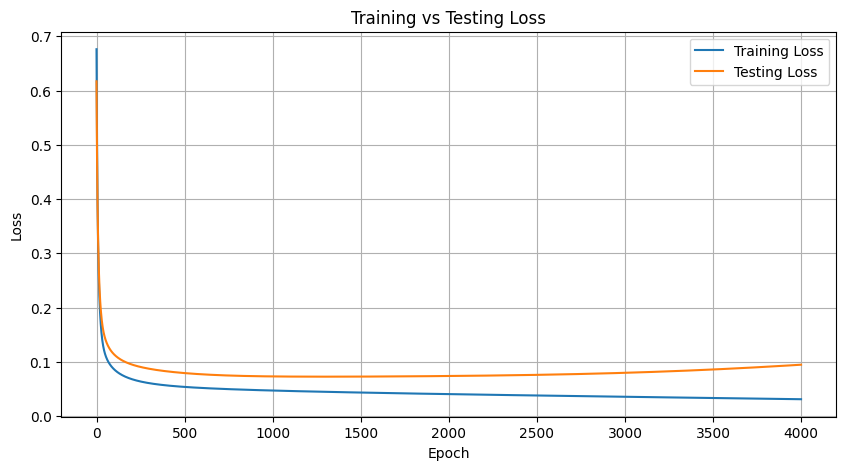

In [11]:
# plot the traing losses and testing losses (0.5 point)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(training_losses, label='Training Loss')
plt.plot(testing_losses, label='Testing Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Testing Loss")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Calculate the testing loss and be sure that it is near the one obtained from sklearn builtin implementation

with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_classes = (predictions > 0.5).float()
    accuracy = (predicted_classes.eq(y_test_tensor).sum() / y_test_tensor.shape[0]).item()

print("PyTorch Model Accuracy:", accuracy)

PyTorch Model Accuracy: 0.9649122953414917


To emphasize the concept of linear classification, we will visualize the decision boundary using a 2D plot that focuses on the two most influential features in the dataset. These features are identified based on the magnitudes of their corresponding linear weights after training—the two with the largest absolute weights are considered the most significant. Once identified, we will extract their values along with the associated weights, and use them to plot all sample points in the feature space. Finally, we will overlay the decision boundary to clearly demonstrate how the classifier separates the data.

In [13]:
# Determine the most significant 2 features during classification as the ones having the largest corresponding linear weights magnitude after training
# Detect these features and extract their values in both train and test samples

# We assumed that the linear layer in the model class is named (linear) and the weights are named (W)
# Modify this line if your variable names are different when defining the models classes
weights = model.linear.W.detach().numpy().flatten()

top2_indices = np.argsort(np.abs(weights))[-2:][::-1]
top2_features = data.feature_names[top2_indices]

# Extract the corresponding features from train and test sets
X_train_selected = X_train[:, top2_indices]
X_test_selected = X_test[:, top2_indices]

print("Indices of top 2 features:", top2_indices)
print("Top 2 feature names:", top2_features.tolist())
print("X_train_selected shape:", X_train_selected.shape)
print("X_test_selected shape:", X_test_selected.shape)

Indices of top 2 features: [ 5 10]
Top 2 feature names: ['mean compactness', 'radius error']
X_train_selected shape: (455, 2)
X_test_selected shape: (114, 2)


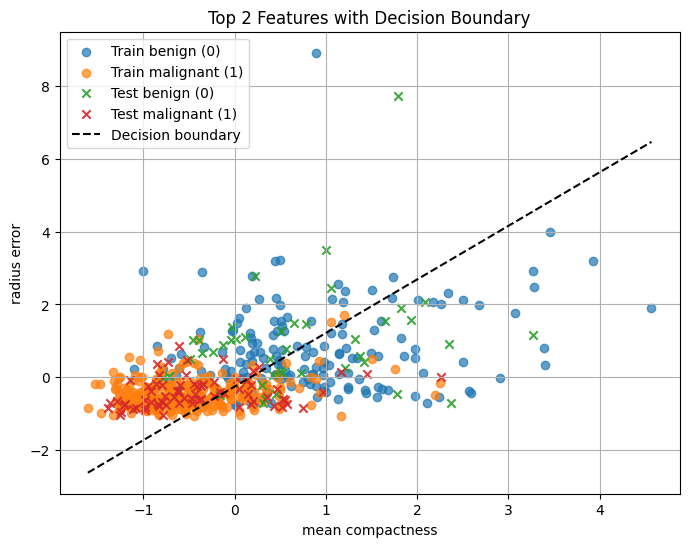

In [14]:
# plot the most significant 2 features in the dataset. (0.5 point)
# Train and test samples should be in a single figure with two different markers and the samples of each class label in each split should have different colors.
# Add a line to the same plot representing the decision boundary as if these 2 features are the only ones using their 2 corresponding learned weights and the learned bias. (0.5 point)

# YOUR CODE HERE
plt.figure(figsize=(8, 6))


train_benign = (y_train == 0)
train_malignant = (y_train == 1)
test_benign = (y_test == 0)
test_malignant = (y_test == 1)

# I Plot train samples (circles)
plt.scatter(
    X_train_selected[train_benign, 0],
    X_train_selected[train_benign, 1],
    c='tab:blue',
    marker='o',
    alpha=0.7,
    label='Train benign (0)'
)
plt.scatter(
    X_train_selected[train_malignant, 0],
    X_train_selected[train_malignant, 1],
    c='tab:orange',
    marker='o',
    alpha=0.7,
    label='Train malignant (1)'
)

# I Plot test samples (crosses)
plt.scatter(
    X_test_selected[test_benign, 0],
    X_test_selected[test_benign, 1],
    c='tab:green',
    marker='x',
    alpha=0.9,
    label='Test benign (0)'
)
plt.scatter(
    X_test_selected[test_malignant, 0],
    X_test_selected[test_malignant, 1],
    c='tab:red',
    marker='x',
    alpha=0.9,
    label='Test malignant (1)'
)

#using the two most significant weights and bias
w1, w2 = weights[top2_indices]          # corresponding weights
b = model.linear.b.detach().item()      # learned bias (scalar)

# Create a range of x values over the selected feature range
x_min = min(X_train_selected[:, 0].min(), X_test_selected[:, 0].min())
x_max = max(X_train_selected[:, 0].max(), X_test_selected[:, 0].max())
x_vals = np.linspace(x_min, x_max, 200)

# For decision boundary: w1 * x1 + w2 * x2 + b = 0  →  x2 = -(w1 * x1 + b) / w2
y_vals = -(w1 * x_vals + b) / w2

plt.plot(x_vals, y_vals, 'k--', label='Decision boundary')

plt.xlabel(top2_features[0])
plt.ylabel(top2_features[1])
plt.title("Top 2 Features with Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()